<a href="https://colab.research.google.com/github/asrianda/GIS/blob/main/lat2/GeoPandas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import datasets, read_file, GeoDataFrame

In [4]:
zipfile = "lsm.zip"
kota= gpd.read_file(zipfile)

In [5]:
kota.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327..."
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845..."
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349..."
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612..."


<Axes: >

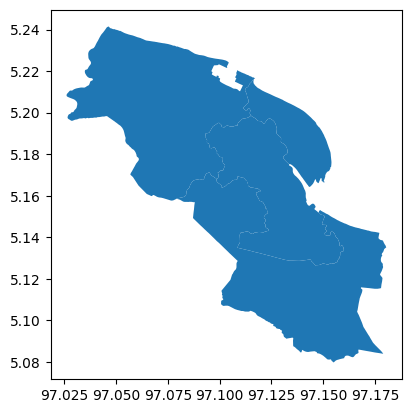

In [6]:
kota.plot()

In [16]:
zip = "aceh.zip"
prov= gpd.read_file(zip)

In [18]:
prov.head()

,OBJECT_ID,KODE_DESA,DESA,KODE,PROVINSI,KAB_KOTA,KECAMATAN,DESA_KELUR,JUMLAH_PEN,JUMLAH_KK,LUAS_WILAY,KEPADATAN,PERPINDAHA,JUMLAH_MEN,PERUBAHAN,WAJIB_KTP,SILAM,KRISTEN,KHATOLIK,HINDU,BUDHA,KONGHUCU,KEPERCAYAA,PRIA,WANITA,BELUM_KAWI,KAWIN,CERAI_HIDU,CERAI_MATI,U0,U5,U10,U15,U20,U25,U30,U35,U40,U45,U50,U55,U60,U65,U70,U75,TIDAK_BELU,BELUM_TAMA,TAMAT_SD,SLTP,SLTA,...,USTADZ,JURU_M,PROMOT,ANGGOTA_,ANGGOTA1,ANGGOTA1_1,PRESIDEN,WAKIL_PRES,ANGGOTA1_2,ANGGOTA1_3,DUTA_B,GUBERNUR,WAKIL_GUBE,BUPATI,WAKIL_BUPA,WALIKOTA,WAKIL_WALI,ANGGOTA1_4,ANGGOTA1_5,DOSEN,GURU,PILOT,PENGACARA_,NOTARIS,ARSITEK,AKUNTA_,KONSUL_,DOKTER,BIDAN,PERAWAT,APOTEK_,PSIKIATER,PENYIA_,PENYIA1,PELAUT,PENELITI,SOPIR,PIALAN,PARANORMAL,PEDAGA_,PERANG_,KEPALA_,BIARAW_,WIRASWAST_,LAINNYA_12,LUAS_DESA,KODE_DES_3,DESA_KEL_1,KODE_12,geometry
0,24.0,1101012001,KEUDE BAKONGAN,110101.0,ACEH,ACEH SELATAN,BAKONGAN,KEUDE BAKONGAN,1330.0,394.0,5.55,240.0,3.0,3.0,1209.0,931.0,1326.0,4.0,0.0,0.0,0.0,0.0,0.0,665.0,665.0,707.0,538.0,9.0,76.0,107.0,126.0,122.0,122.0,98.0,91.0,95.0,122.0,116.0,79.0,77.0,59.0,48.0,30.0,17.0,21.0,249.0,152.0,245.0,167.0,342.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,28.0,0.0,1.0,0.0,95.0,0.0,23.0,1101012001,KEUDE BAKONGAN,110101.0,"POLYGON ((97.47670 2.93545, 97.48346 2.93328, ..."
1,26.0,1101012003,UJUNG PADANG,110101.0,ACEH,ACEH SELATAN,BAKONGAN,UJUNG PADANG,640.0,190.0,11.59,55.0,4.0,2.0,570.0,459.0,640.0,0.0,0.0,0.0,0.0,0.0,0.0,323.0,317.0,327.0,266.0,9.0,38.0,48.0,56.0,48.0,73.0,61.0,47.0,54.0,50.0,40.0,45.0,23.0,33.0,23.0,13.0,9.0,17.0,106.0,88.0,246.0,89.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,13.0,0.0,25.0,1101012003,UJUNG PADANG,110101.0,"POLYGON ((97.47670 2.93545, 97.47282 2.94642, ..."
2,102.0,1101052020,LHOK AMAN,110105.0,ACEH,ACEH SELATAN,MEUKEK,LHOK AMAN,1132.0,342.0,1.80,668.0,0.0,2.0,1048.0,830.0,1132.0,0.0,0.0,0.0,0.0,0.0,0.0,571.0,561.0,574.0,476.0,9.0,73.0,92.0,93.0,95.0,89.0,89.0,91.0,119.0,85.0,87.0,72.0,60.0,41.0,43.0,34.0,20.0,22.0,238.0,119.0,343.0,156.0,200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,17.0,2.0,1.0,0.0,37.0,0.0,101.0,1101052020,LHOK AMAN,110105.0,"POLYGON ((97.09457 3.43455, 97.08767 3.43208, ..."
3,33.0,1101022003,PASI KUALA ASAHAN,110102.0,ACEH,ACEH SELATAN,KLUET UTARA,PASI KUALA ASAHAN,743.0,189.0,3.32,224.0,2.0,1.0,631.0,517.0,743.0,0.0,0.0,0.0,0.0,0.0,0.0,398.0,345.0,414.0,298.0,1.0,30.0,62.0,74.0,61.0,86.0,76.0,50.0,67.0,47.0,51.0,38.0,34.0,33.0,20.0,16.0,14.0,14.0,143.0,90.0,264.0,127.0,115.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,8.0,0.0,1.0,0.0,14.0,0.0,32.0,1101022003,PASI KUALA ASAHAN,110102.0,"MULTIPOLYGON (((97.31123 3.11865, 97.31261 3.1..."
4,34.0,1101022004,GUNUNG PULO,110102.0,ACEH,ACEH SELATAN,KLUET UTARA,GUNUNG PULO,756.0,212.0,5.73,132.0,0.0,2.0,665.0,550.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,386.0,370.0,403.0,309.0,2.0,42.0,61.0,60.0,57.0,70.0,65.0,58.0,71.0,69.0,58.0,46.0,38.0,28.0,20.0,20.0,20.0,15.0,125.0,117.0,256.0,115.0,128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0,24.0,0.0,33.0,1101022004,GUNUNG PULO,110102.0,"POLYGON ((97.34582 3.13380, 97.34865 3.13111, ..."


<Axes: >

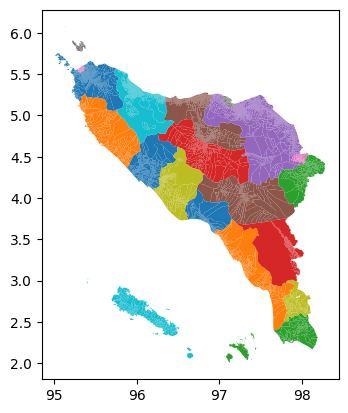

In [19]:
prov.plot(column='KAB_KOTA')

In [42]:
filename = "lsmjson.geojson"
file = open(filename)
df = gpd.read_file(file)

<Axes: >

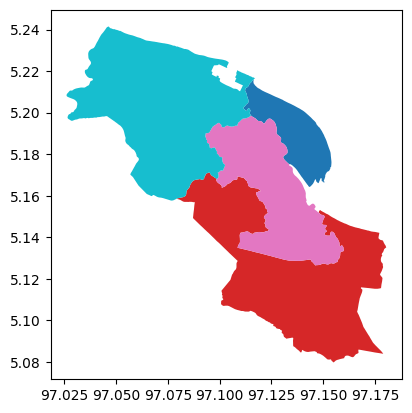

In [72]:
df.plot(column="NAMOBJ")

In [48]:
import mapclassify
df.explore()

In [51]:
kota.explore(
    column="NAMOBJ",  # make choropleth based on "BoroName" column
    tooltip="NAMOBJ",  # show "BoroName" value in tooltip (on hover)
    popup=True,  # show all values in popup (on click)
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="Set1",  # use "Set1" matplotlib colormap
    style_kwds=dict(color="black"),  # use black outline
)

In [57]:
import folium

m = kota.explore(
    column="NAMOBJ",  # make choropleth based on "POP2010" column
    scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=True,  # show legend
    k=10,  # use 10 bins
    tooltip=False,  # hide tooltip
    popup=["NAMOBJ", "NAMOBJ"],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="NAMOBJ",  # name of the layer in the map
)

kota.explore(
    m=m,  # pass the map object
    color="red",  # use red color on all points
    marker_kwds=dict(radius=5, fill=True),  # make marker radius 10px with fill
    tooltip="NAMOBJ",  # show "name" column in the tooltip
    tooltip_kwds=dict(labels=False),  # do not show column label in the tooltip
    name="NAMOBJ",  # name of the layer in the map
)

folium.TileLayer("CartoDB positron", show=False).add_to(
    m
)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

m  # show map

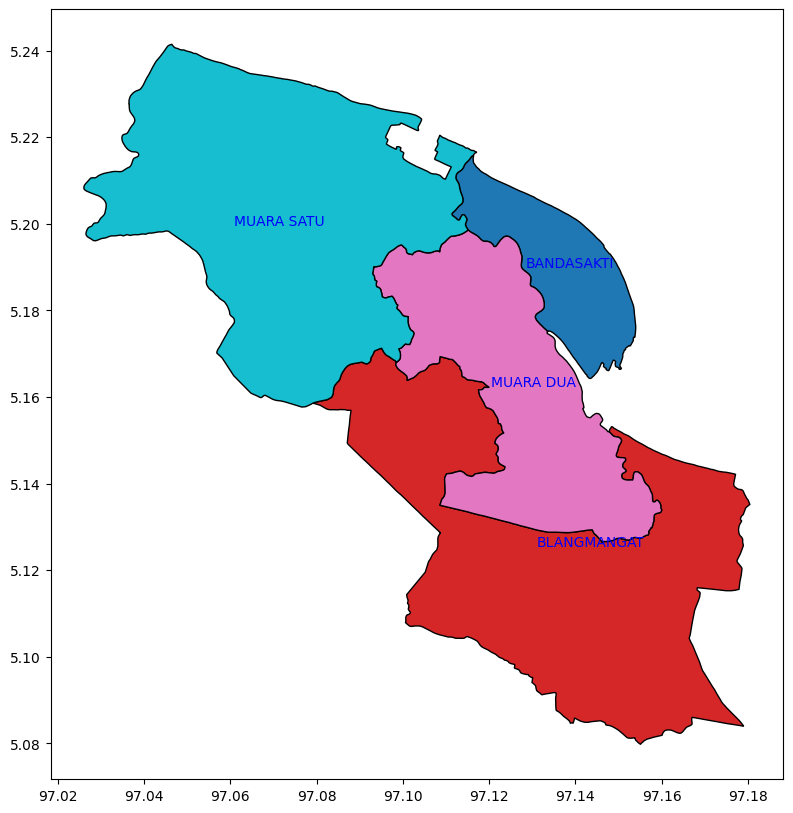

In [74]:
kota["coords"] = kota["geometry"].apply(lambda x: x.representative_point().coords[:])
kota["coords"] = [coords[0] for coords in kota["coords"]]
fig, ax = plt.subplots(figsize = (10,10))
kota.plot(ax=ax,   column="NAMOBJ", categorical=True,edgecolor="black", )
for idx, row in kota.iterrows():
   plt.annotate(text=row["NAMOBJ"], xy=row["coords"], horizontalalignment="center", color="blue")

In [47]:
#-- Install mapclassifi --
pip install mapclassify